In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
# from sklearn.pipeline import Pipeline

Q3: SVM - 15 marks  
Use the dataset “Bank_Personal_Loan_Modelling.csv” 

1. Store the dataset in your google drive and in Colab file load the dataset from your drive.


In [2]:
Bank_Personal_Loan_Modelling_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

2. Check the shape and head of the dataset. 

In [3]:
print (Bank_Personal_Loan_Modelling_df.shape)
display(Bank_Personal_Loan_Modelling_df.head())

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


3. Age, Experience, Income, CCAvg, Mortgage, Securities are the features and Credit Card 
is your Target Variable. 
    1. Take any 3 features from the six features given above
    2. Store features and targets into a separate variable

In [35]:
features = ["Age","Experience","CCAvg"]
target = ["CreditCard"] 
target_df = Bank_Personal_Loan_Modelling_df[target]

features_df = Bank_Personal_Loan_Modelling_df[features]

    3. Look for missing values in the data, if any, and address them accordingly.

In [36]:
# Bank_Personal_Loan_Modelling_df.isna().sum()
display(features_df.isna().sum())
display(target_df.isna().sum())

Age           0
Experience    0
CCAvg         0
dtype: int64

CreditCard    0
dtype: int64

No nulls in the features data and no nulls in the entire dataset as well 

    4. Plot a 3D scatter plot using Matplotlib. 

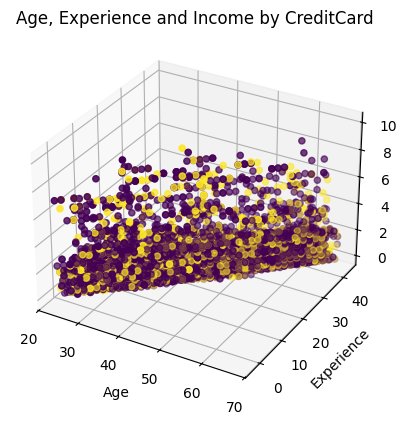

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter3D(
    xs=features_df[features[0]],
    ys=features_df[features[1]],
    zs=features_df[features[2]],
    c=target_df[target[0]])

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title(f'Age, Experience and Income by {target[0]}')

plt.show()

4. Split the dataset into 80:20. (3 features and 1 target variable). 

In [ ]:
# scaling to make visualization and training easier
# scaler = StandardScaler()
# features_df = pd.DataFrame(scaler.fit_transform(features_df), columns=features,
#                                index=features_df.index)

X_train, X_test, y_train, y_test = train_test_split(
    features_df, target_df,
    test_size=0.20, random_state=42,
    stratify=target_df,shuffle=True)

5. Train the model using scikit learn SVM API (LinearSVC) by setting the regularization 
parameter C as C = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}.  
 
    1. For each value of C Print the score on test data
    2. Make the prediction on test data
    3. Print confusion matrix and classification report 

In [40]:
possibili_Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in possibili_Cs:
    LinearSVC_clf = LinearSVC(C=C_value,random_state=42)
    LinearSVC_clf.fit(X_train, y_train)
    y_pred = LinearSVC_clf.predict(X_test)

    # cm = confusion_matrix(y_test, y_pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    # disp.plot()
    # plt.title(f"Confusion Matrix for Linear SVC at C = {C_value}")
    # plt.show()
    
    report = classification_report(y_test, y_pred)
    print(C_value,"\n",report)
    
    # break
    print("\n"*3)

0.0001 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000





0.001 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.58      1000





0.01 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       706
           1       0.00      0.00      0.00       294

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.5

6. Use gridSearchCV a cross-validation technique to find the best regularization
parameters  
(i.e.: the best value of C).


In [9]:
# svc_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('svc', LinearSVC(random_state=42))
# ])

In [10]:
param_grid = {
    'C': possibili_Cs,
    "random_state":[42]
}

In [11]:
grid_search = GridSearchCV(
    estimator= LinearSVC(random_state=42),
    # svc_pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train, y_train)

/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'random_state': [42]},
             scoring='accuracy')

In [20]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_params = {**grid_search.best_params_}


Best parameters: {'C': 0.0001, 'random_state': 42}
Best cross-validation score: 0.7060000000000001


In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid',]
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc

In [19]:
for kernel in kernels:
    clf =SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    
    precision, recall, _ = precision_recall_curve(y_train, clf.predict(X_train))
    train_pr_auc = auc(recall, precision)

    precision, recall, _ = precision_recall_curve(y_test, clf.predict(X_test))
    test_pr_auc = auc(recall, precision)



    print(f'{kernel}:\t{train_pr_auc} \t{test_pr_auc}')



linear:	0.647 	0.647
poly:	0.647 	0.647
rbf:	0.647 	0.647
sigmoid:	0.37770928749831834 	0.3936156462585034


In the report provide your findings for the output generated for all the kernels used and also
describe the changes that happened after changing the regularization hyperparameter.


Kernels used:
    1. Linear , Polynomial and RBF kernels : AUPRC of 64.7
    2. Sigmoid kernel: AUPRC of .37 ~ .39

As expected the sigmoid kernel did not give a great results as none of the input variables are which that can be be divided into 0 and 1

Changing the regularization hyperparameter seems to have near to no effect on the classification model though.